In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and Visualise the data

In [4]:
X=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/Marks Prediction Project/Training Data/Linear_X_Train.csv")
Y=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/Marks Prediction Project/Training Data/Linear_Y_Train.csv")

In [5]:
#X.head()
Y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


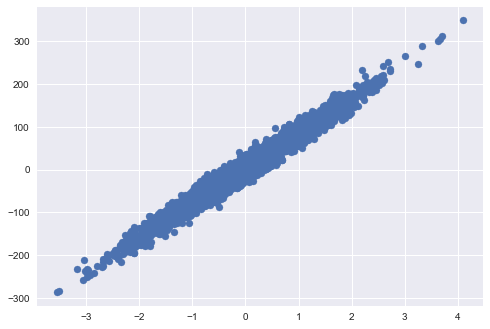

In [6]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

In [7]:
# Convert X,Y to numpy array
X=X.values
Y=Y.values

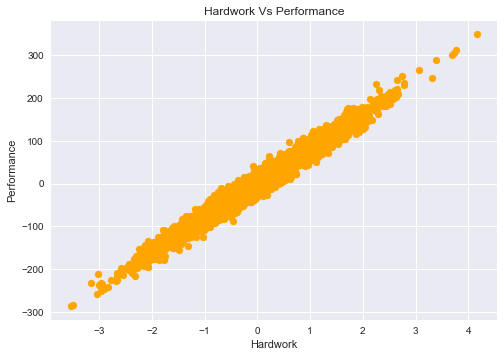

In [8]:
# Normalisation
u=X.mean()
std=X.std()
X=(X-u)/std

plt.style.use('seaborn')
plt.scatter(X,Y,color='orange')
plt.title("Hardwork Vs Performance")
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

## Linear Regression

In [9]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [10]:
theta,error_list,theta_list = gradientDescent(X,Y)

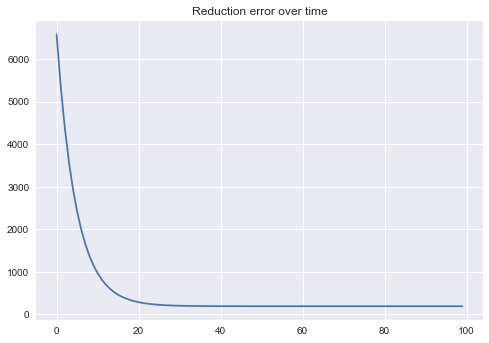

In [11]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

# Predictions

In [12]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


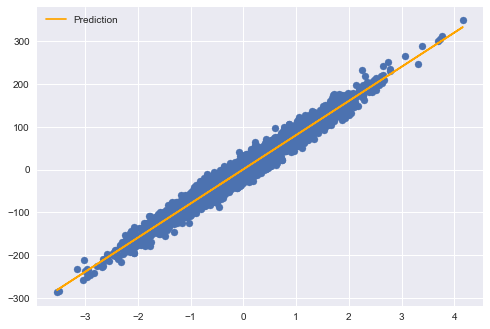

In [13]:
# Training + Predictions
plt.scatter(X,Y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [14]:
# Load the test data
X_test = pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/Marks Prediction Project/Test Cases/Linear_X_Test.csv")
y_test = hypothesis(X_test,theta)

In [15]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [16]:
df.to_csv('y_prediction.csv',index=False)

## Computing Score

In [17]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [18]:
r2_score(Y,y_)

97.09612226971643

## Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [20]:
theta

array([ 0.6838508 , 79.90361453])

In [23]:
# Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]

#print(J.shape)

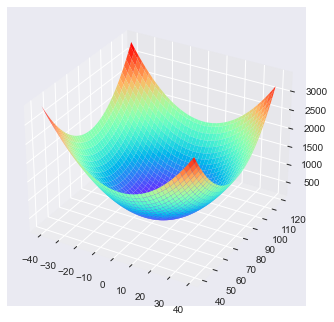

In [24]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

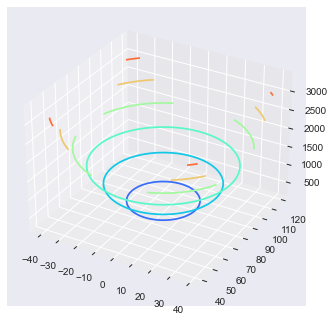

In [25]:
# Contour Plot 
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

## Plot the changes in values of theta

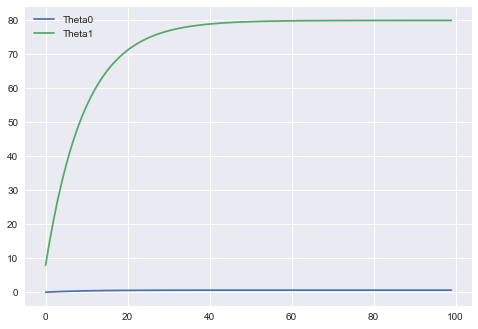

In [26]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

## Trajectory traced by Theta Updates in the Loss Function

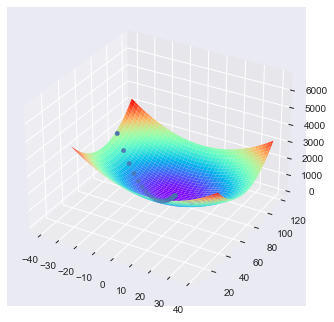

In [27]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

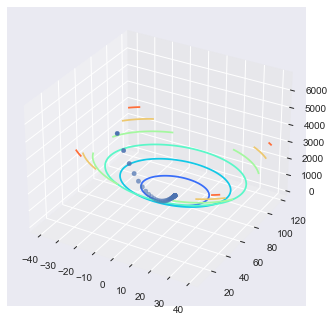

In [28]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

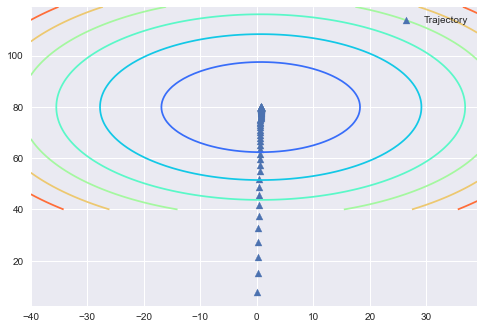

In [29]:
# 2D Contour Plot 
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

In [30]:
# Save the data in file

theta_list
np.save("ThetaList.npy",theta_list)

In [32]:
np.save

<function numpy.save(file, arr, allow_pickle=True, fix_imports=True)>